In [ ]:
import pandas as pd
df = pd.read_csv("Editedstoredata.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  


In [2]:
from prophet import Prophet

model = Prophet()
model.fit(daily_sales)


12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:42 - cmdstanpy - INFO - Chain [1] done processing


In [3]:

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


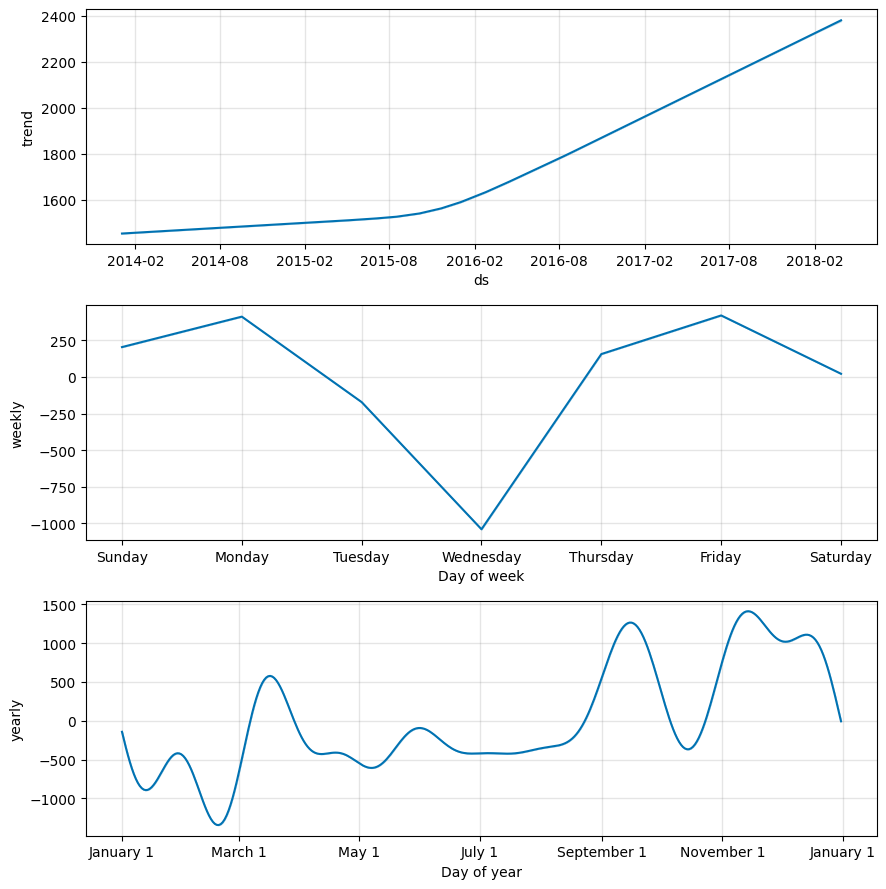

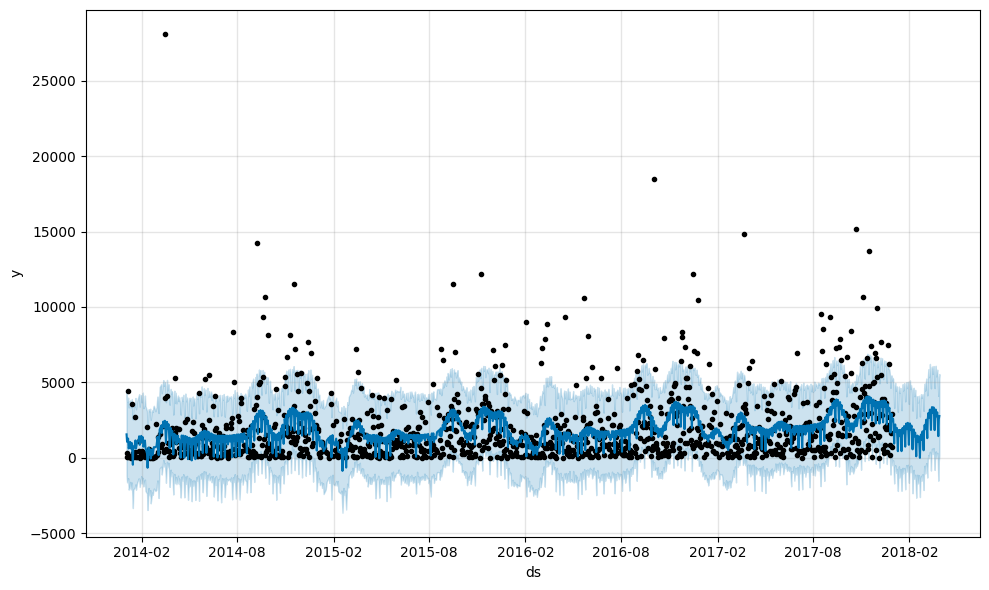

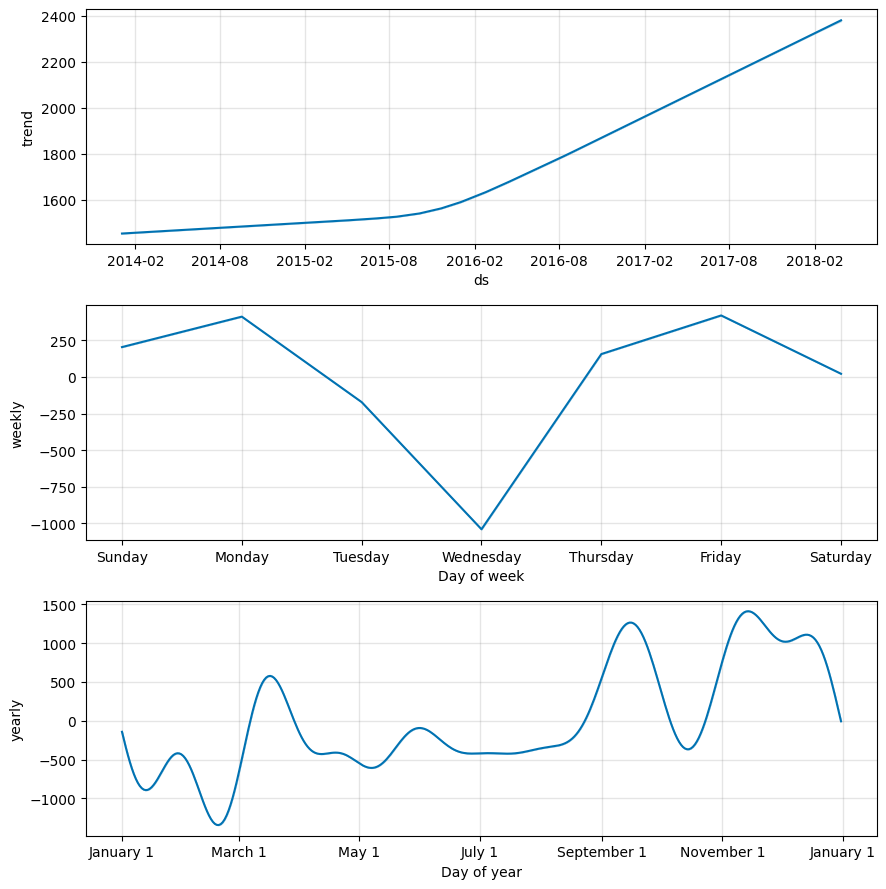

In [4]:
model.plot(forecast)
model.plot_components(forecast)



In [5]:
forecast[['ds', 'yhat']].to_csv('futureforecast.csv', index=False)
